1. Target Variable distribution across others fearures. 
2. Limit and histogram
3. Identify outliers visually. 

In [1]:
## utils functions
%run extras/lab_utils_cls.ipynb

In [2]:
churn_data_loc = "https://raw.githubusercontent.com/chrisdmell/DataScience/master/data_dump/02_cred/data_for_churn_analysis.csv"

In [3]:
df_chrun = Utils.load_data(churn_data_loc)

In [4]:
df_chrun.head()

,device,first_payment_amount,age,city,number_of_cards,payments_initiated,payments_failed,payments_completed,payments_completed_amount_first_7days,reward_purchase_count_first_7days,coins_redeemed_first_7days,is_referral,visits_feature_1,visits_feature_2,given_permission_1,given_permission_2,user_id,is_churned
0,samsung,0,20.0,Ahmedabad,2.0,1.0,0.0,1.0,0.0,NaN,0.0,False,3.0,0.0,1,0,269438,0
1,xiaomi,0,20.0,Surat,1.0,1.0,0.0,1.0,0.0,NaN,0.0,True,0.0,0.0,1,0,139521,0
2,xiaomi,0,20.0,Kullu,1.0,2.0,1.0,1.0,0.0,0.0,0.0,True,0.0,0.0,0,1,307352,0
3,oneplus,0,20.0,Mumbai,2.0,4.0,1.0,2.0,322.0,2.0,20.0,False,0.0,0.0,1,1,456424,0
4,apple,0,20.0,Pune,2.0,1.0,0.0,1.0,0.0,0.0,0.0,False,0.0,1.0,1,1,398779,0


In [10]:
df_chrun.groupby(["is_referral", "is_churned"]).count()

device  first_payment_amount    age   city  \
is_referral is_churned                                               
False       0            46024                 46058  46003  43277   
            1            14944                 14966  14934  12770   
True        0            28174                 28216  28181  27636   
            1            14883                 14903  14883  14618   

                        number_of_cards  payments_initiated  payments_failed  \
is_referral is_churned                                                         
False       0                     45806               45806            45806   
            1                     14917               14917            14917   
True        0                     28091               28091            28091   
            1                     14857               14857            14857   

                        payments_completed  \
is_referral is_churned                       
False       0                        45806   
            1                        14917   
True        0                        28091   
            1                        14857   

                        payments_completed_amount_first_7days  \
is_referral is_churned                                          
False       0                                           45806   
            1                                           14917   
True        0                                           28091   
            1                                           14857   

                        reward_purchase_count_first_7days  \
is_referral is_churned                                      
False       0                                       41378   
            1                                        7599   
True        0                                       25243   
            1                                        6659   

                        coins_redeemed_first_7days  visits_feature_1  \
is_referral is_churned                                                 
False       0                                45806             44975   
            1                                14917             14460   
True        0                                28091             27643   
            1                                14857             14419   

                        visits_feature_2  given_permission_1  \
is_referral is_churned                                         
False       0                      44975               46058   
            1                      14460               14966   
True        0                      27643               28216   
            1                      14419               14903   

                        given_permission_2  user_id  
is_referral is_churned                               
False       0                        46058    46058  
            1                        14966    14966  
True        0                        28216    28216  
            1                        14903    14903

<AxesSubplot:xlabel='is_referral,is_churned'>

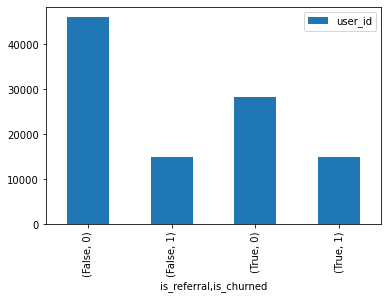

In [28]:
color_list = {1:'green', 0: 'red'}

df_chrun.groupby(["is_referral", "is_churned"]).agg({"user_id":"count"}).plot.bar()

In [21]:
df_chrun.groupby(["is_referral", "is_churned"]).agg({"user_id":"count"}).reset_index()

,is_referral,is_churned,user_id
0,False,0,46058
1,False,1,14966
2,True,0,28216
3,True,1,14903


In [35]:
df_chrun["payment_check"] = df_chrun.payments_completed  + df_chrun.payments_failed

In [40]:
df_chrun["payment_test"] = df_chrun.payments_initiated -  df_chrun.payments_completed  + df_chrun.payments_failed

In [36]:
df_chrun["payment_check_flag"]  = np.where(df_chrun["payment_check"] == df_chrun["payments_initiated"], "no_error", "error")

In [37]:
df_chrun.head()

,device,first_payment_amount,age,city,number_of_cards,payments_initiated,payments_failed,payments_completed,payments_completed_amount_first_7days,reward_purchase_count_first_7days,coins_redeemed_first_7days,is_referral,visits_feature_1,visits_feature_2,given_permission_1,given_permission_2,user_id,is_churned,payment_check,payment_check_flag
0,samsung,0,20.0,Ahmedabad,2.0,1.0,0.0,1.0,0.0,NaN,0.0,False,3.0,0.0,1,0,269438,0,1.0,no_error
1,xiaomi,0,20.0,Surat,1.0,1.0,0.0,1.0,0.0,NaN,0.0,True,0.0,0.0,1,0,139521,0,1.0,no_error
2,xiaomi,0,20.0,Kullu,1.0,2.0,1.0,1.0,0.0,0.0,0.0,True,0.0,0.0,0,1,307352,0,2.0,no_error
3,oneplus,0,20.0,Mumbai,2.0,4.0,1.0,2.0,322.0,2.0,20.0,False,0.0,0.0,1,1,456424,0,3.0,error
4,apple,0,20.0,Pune,2.0,1.0,0.0,1.0,0.0,0.0,0.0,False,0.0,1.0,1,1,398779,0,1.0,no_error


In [33]:
df_chrun["payments_initiated"].sum(skipna=True)

295193.0

In [34]:
df_chrun["payments_failed"].sum(skipna=True)

45609.0

In [38]:
df_chrun["payments_completed"].sum(skipna=True)

189788.0

In [39]:
df_chrun["payments_initiated"].sum(skipna=True) - (df_chrun["payments_failed"].sum(skipna=True) + df_chrun["payments_completed"].sum(skipna=True))

59796.0

In [52]:
payments_erros_Df = df_chrun.groupby([ "device"]).agg({"payment_test":"sum","payments_initiated":"sum","user_id":"count" }).sort_values(by = ["payment_test"], ascending=False).reset_index()

In [54]:
payments_erros_Df["error_ratio"] = (payments_erros_Df.payment_test/payments_erros_Df.payments_initiated)*100
payments_erros_Df.head()

,device,payment_test,payments_initiated,user_id,error_ratio
0,xiaomi,36046.0,72719.0,25009,49.568888
1,samsung,24956.0,47851.0,16657,52.153560
2,apple,23377.0,44507.0,15811,52.524322
3,oneplus,18858.0,38172.0,14613,49.402704
4,vivo,12357.0,23046.0,8523,53.618849


In [55]:
df_chrun.groupby(["payment_check_flag", "is_churned"]).agg({"user_id":"count"}).reset_index()

,payment_check_flag,is_churned,user_id
0,error,0,26619
1,error,1,7950
2,no_error,0,47655
3,no_error,1,21919
